In [17]:
BENCHMARK_FILE = 'data/benchmark.csv'

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set();

In [19]:
names = ['file', 'extractor', 'references', 'validated', 'time_ms']
types = ['str', 'str', 'int', 'int', 'int']
benchmark_data = pd.read_csv(BENCHMARK_FILE, 
                             names=names,
                             dtype=dict(zip(names, types)))
benchmark_data['parsed_smth'] = benchmark_data['references'] > 0

FileNotFoundError: [Errno 2] File data/benchmark.csv does not exist: 'data/benchmark.csv'

In [12]:
benchmark_data[:100]

,file,extractor,references,validated,time_ms,parsed_smth
0,hep-ph0001029,Custom,94,47,30365,True
1,hep-ph0001029,Grobid,94,47,1325,True
2,hep-lat0001014,Custom,43,69,925,True
3,hep-lat0001014,Grobid,43,69,590,True
4,astro-ph0001083,Custom,16,71,440,True
...,...,...,...,...,...,...
95,cond-mat0001403,Grobid,31,701,312,True
96,cond-mat0001431,Custom,11,705,88,True
97,cond-mat0001431,Grobid,11,707,308,True
98,cond-mat0001362,Custom,29,716,867,True


In [15]:
benchmark_data.groupby('extractor').agg(
    average_references=pd.NamedAgg(column='references', aggfunc='mean'),
    average_validated=pd.NamedAgg(column='validated', aggfunc='mean'),
    average_time_ms=pd.NamedAgg(column='time_ms', aggfunc='mean'),
    parsed_files=pd.NamedAgg(column='parsed_smth', aggfunc='sum'),
    total_files=pd.NamedAgg(column='parsed_smth', aggfunc='count')
)

,average_references,average_validated,average_time_ms,parsed_files,total_files
extractor,,,,,
Custom,31.04118,14269.256539,600.402894,1764.0,1797
Grobid,31.53645,14520.222037,622.189761,1776.0,1797


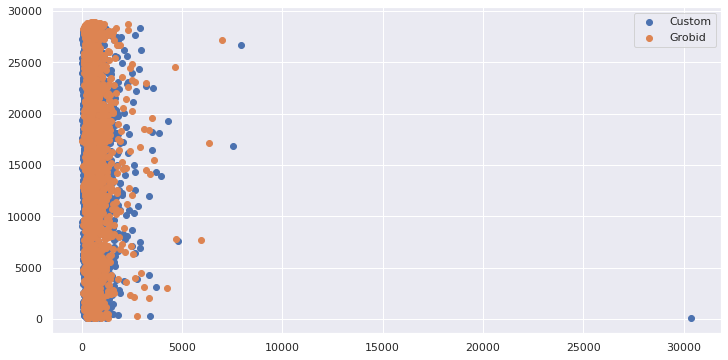

In [16]:
plt.figure(figsize=(12, 6))
for key, grp in benchmark_data.groupby(['extractor']):
    plt.scatter(grp['time_ms'], grp['validated'], label=key)
plt.legend()
plt.show()